In [2]:
import iris
import iris.analysis
import iris.plot as iplt
import matplotlib.pyplot as plt
import datetime
import iris.quickplot as qplt
import pickle
import numpy as np
import datetime
import pylab
import pickle as cPickle
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# from tigramite.pcmci import PCMCI 
# from tigramite.independence_tests import ParCorr
# from tigramite.plotting import plot_graph
# import tigramite.data_processing as pp
# from tigramite.models import LinearMediation
import sklearn
import sklearn.metrics
import scipy
import pandas as pd
import cartopy
# from models import *
import sklearn
import sklearn.metrics
import scipy
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob
import iris
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
# import tigramite
# import tigramite.plotting as tp
import netCDF4
import scipy.stats as stats
import iris.analysis.stats
import iris.coord_categorisation
import copy
import matplotlib.colors as colors
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# import fiona
from shapely.geometry import Polygon,MultiPolygon
import scienceplots
plt.style.use(['science','nature'])

In [ ]:
# pdfjam ./plot_components_map/map_60components_era5_djf.pdf ./plot_components_map/map_60components_era5_mam.pdf ./plot_components_map/map_60components_era5_jja.pdf ./plot_components_map/map_60components_era5_son.pdf --nup 2x2 --outfile ./plot_components_map/map_60components_combined_era5.pdf --papersize '{60cm,30cm}' --scale 1.0 --noautoscale false

In [ ]:
# pdfjam map_ncep_dependencies_revised.pdf map_era5_dependencies_revised.pdf --nup 2x1 --outfile map_dependencies_revised.pdf --papersize '{60cm,30cm}' --scale 1.0 --noautoscale false

### Plot map of PCA components for 1979-2014

All times :
DimCoord :  time / (days since 1850-1-1 00:00:00, standard calendar)
    points: [
        1979-01-01 11:30:00, 1979-01-02 11:30:00, ...,
        2014-12-30 11:30:00, 2014-12-31 11:30:00]
    bounds: [
        [1979-01-01 00:00:00, 1979-01-01 23:00:00],
        [1979-01-02 00:00:00, 1979-01-02 23:00:00],
        ...,
        [2014-12-30 00:00:00, 2014-12-30 23:00:00],
        [2014-12-31 00:00:00, 2014-12-31 23:00:00]]
    shape: (13149,)  bounds(13149, 2)
    dtype: float64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'


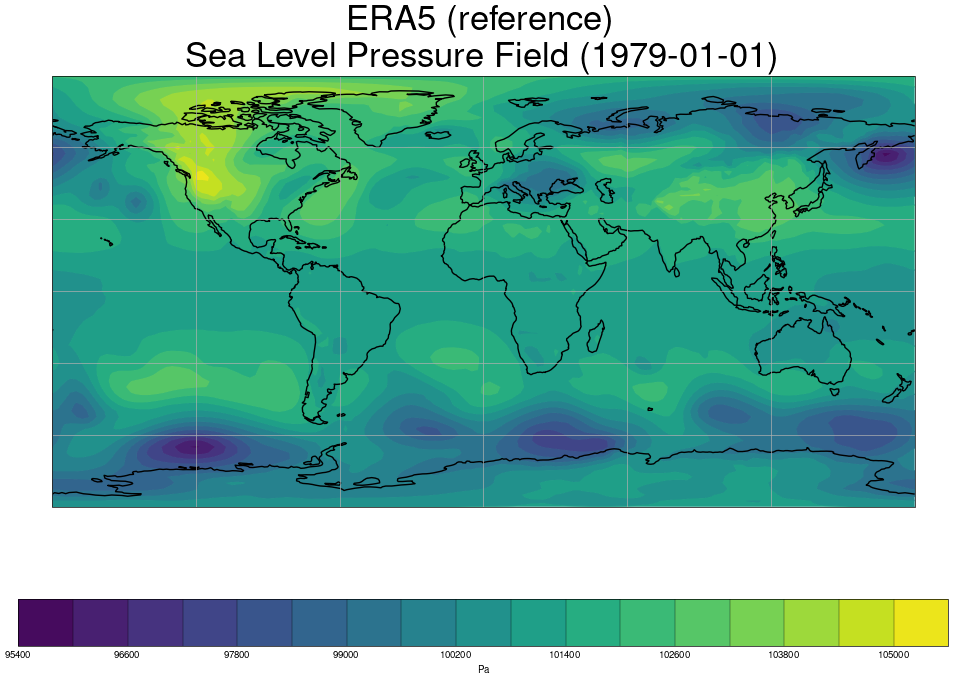

In [5]:
psl_cube = iris.load_cube("/work/bd1083/b309165/CMIP6_CME/data/era5_data/OBS6_ERA5_reanaly_1_day_psl_1979-2014.nc")
print('All times :\n' + str(psl_cube.coord('time')))
date_str = '1979-01-01 11:30:00'
date_format = '%Y-%m-%d %H:%M:%S'
d1 = datetime.datetime.strptime(date_str, date_format)
time_01_01_1979 = iris.Constraint(time=lambda cell: cell.point == d1)
cube_11 = psl_cube.extract(time_01_01_1979)
scheme = iris.analysis.Linear(extrapolation_mode='mask')
cube_11.coord("longitude").guess_bounds()
cube_11.coord("latitude").guess_bounds()

plt.figure(figsize=(12, 8))
qplt.contourf(cube_11,15)
#iplt.pcolormesh(cube_11)
plt.title('ERA5 (reference) \n Sea Level Pressure Field (1979-01-01)', fontsize=25)
#          'on a global longitude latitude grid')
ax = plt.gca()
ax.coastlines()
ax.gridlines()


plt.show()

### Load IPCC region
https://essd.copernicus.org/articles/12/2959/2020/

https://github.com/SantanderMetGroup/ATLAS/tree/master/reference-regions

Question: should we include MED in Europe ??

In [3]:
from shapely.geometry.polygon import LinearRing
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point
polygons_list=[]
regions_list=[]
# cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8])  # This is the position for the colorbar
# # cbar=fig.colorbar(im,cax=cbaxes,orientation='vertical',pad=0.09,extend='max',fraction=0.01,shrink=1.0,aspect=20)
# cbar=fig.colorbar(im,cax=cbaxes,orientation='vertical',extend='max')
# cbaxes.yaxis.set_ticks_position('left')
# cbar.set_label('Precipitation (mm/day)',size=14)
psl_cube = netCDF4.Dataset("/work/bd1083/b309165/CMIP6_CME/data/era5_data/OBS6_ERA5_reanaly_1_day_psl_1979-2014.nc")
lon= psl_cube['lon'][:]
lat= psl_cube['lat'][:]

In [4]:
shapefile_path= "/pf/b/b309165/work/auxiliary_data/shapefiles/"

### Display PCA Varima Comp loading map

### DJF

0.650155668604663


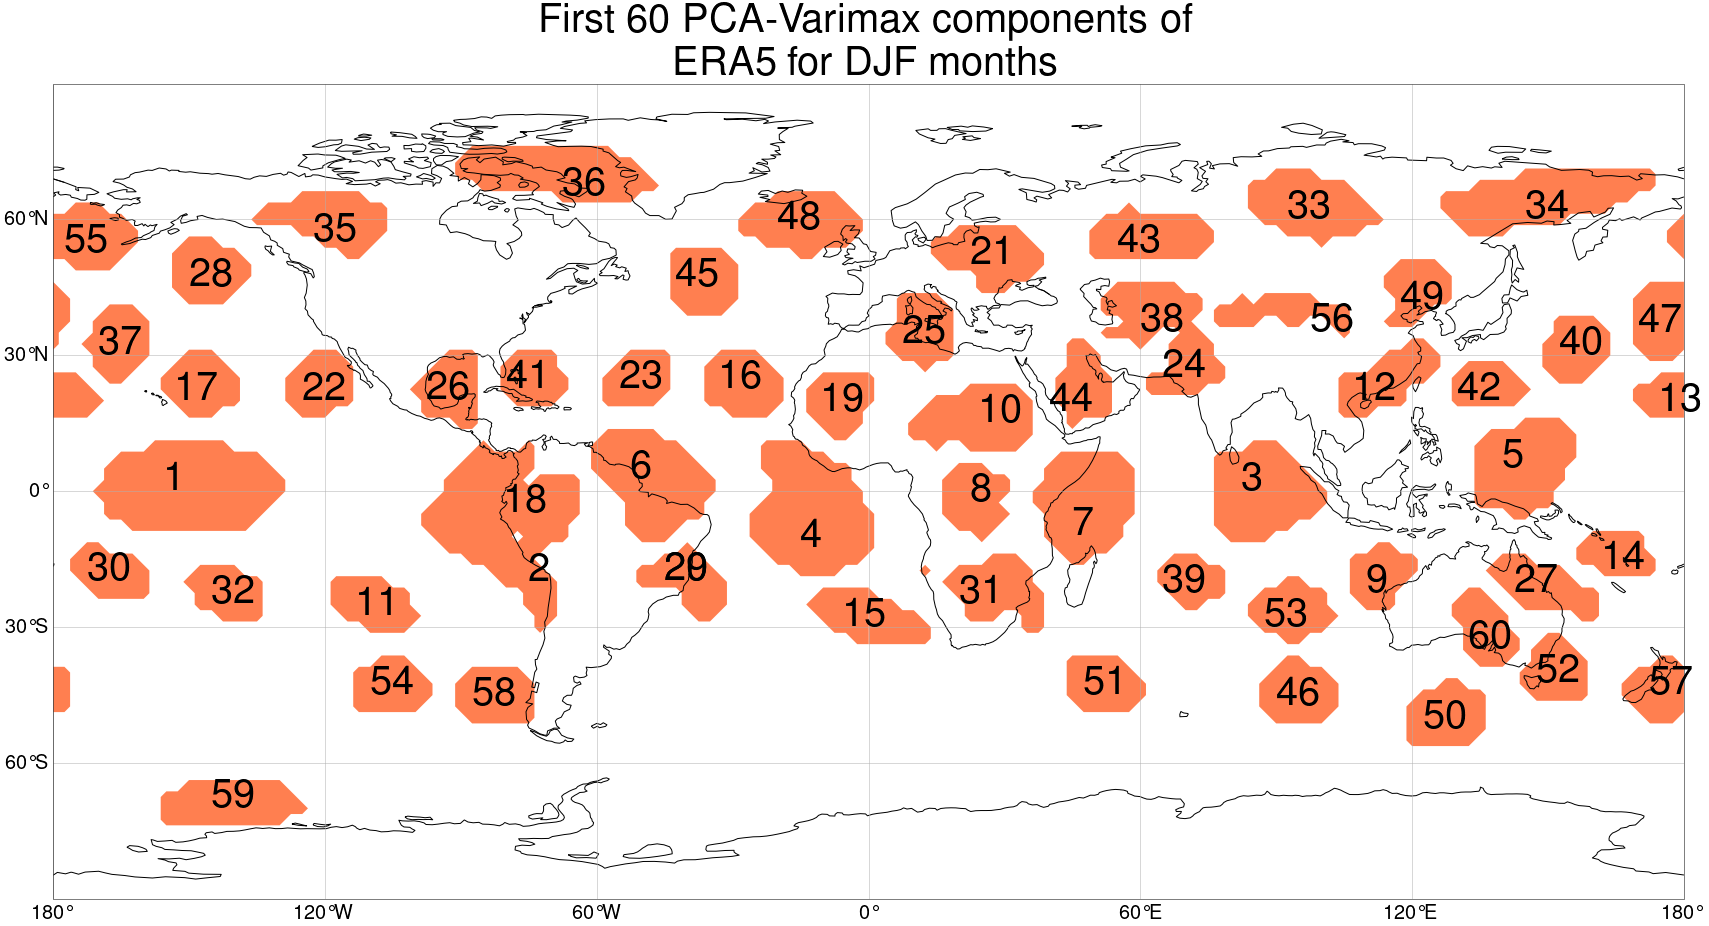

In [10]:
ncar_weights = pickle.load(open("/work/bd1083/b309165/CMIP6_CME/output_pca/era5_1979-2014_weights_timebin1/varimax_OBS6_ERA5_reanaly_1_day_psl_1979-2014_detrend.nc_100-comps_timebin-1_months-[12, 1, 2].bin","rb"))
    #print(ncar_weights["results"].keys())
    #print(ncar_weights["results"]["weights"][:,0].reshape(144,-1))
cube_ncar_weights = cube_11
comp_used=60
selected_comps_file="/work/bd1083/b309165/CMIP6_CME/script/selected_comps_files_1979-2014_timebin1/selected_comps_era5_djf.csv"
comps_csv = pd.read_csv(selected_comps_file)
all_modes = np.zeros((comp_used,73,144))
max_positions=np.zeros((comp_used,2))
for i in range(comp_used):
    idx= int(comps_csv["comps"][i])
    cube_ncar_data = np.concatenate((np.zeros((1,144)),ncar_weights["results"]["weights"][:,idx].reshape(71,144),np.zeros((1,144))),axis=0)
    cube_ncar_weights.data = cube_ncar_data
    vmax = np.amax(cube_ncar_weights.data)
    vmax_pos = np.unravel_index(np.argmax(cube_ncar_weights.data, axis=None), cube_ncar_weights.data.shape)
    vmin= -vmax
    mode_core = np.where(cube_ncar_weights.data > 0.8*vmax,np.ones(cube_ncar_weights.data.shape),np.zeros(cube_ncar_weights.data.shape))
    all_modes[i,:]=mode_core
    lat_max,lon_max= lat[vmax_pos[0]],lon[vmax_pos[1]]
    if lon_max > 180: lon_max-= 360
    max_positions[i,:]= lat_max,lon_max

all_modes= np.maximum.reduce(all_modes)
cube_ncar_weights.data=all_modes
fig = plt.figure(figsize=(30, 15))
qplt.contourf(cube_ncar_weights,1,colors=("white","coral"), add_colorbar=False)
plt.gci().colorbar.remove()
ax = plt.gca()
ax.coastlines()
gridlines=ax.gridlines(draw_labels=True)
# Set properties for the gridline labels
gridlines.xlabels_top = False
gridlines.ylabels_right = False

# Optional: Customize the appearance of the labels
gridlines.xlabel_style = {'size': 20, 'color': 'black'}
gridlines.ylabel_style = {'size': 20, 'color': 'black'}
print(sum(ncar_weights["results"]["explained_var"][:60]/ncar_weights["results"]["total_var"]))

max_x_position= max_positions[:,1]
max_y_position= max_positions[:,0]
for x, y, mode_number in zip(max_x_position, max_y_position, range(1,comp_used+1)) :
    ax.text(x, y, str(mode_number), color="black",
             horizontalalignment='center',verticalalignment='center',fontweight="semibold",fontsize=40)
    # plt.text(-125, -5, "mode 1", color="green")
    # plt.text(-40, -5, "mode 2", color="green")
plt.title('First 60 PCA-Varimax components of \n ERA5 for DJF months',ha="center",fontsize=40)
plt.savefig('plot_components_map/map_60components_era5_djf.pdf', dpi=300)
plt.show()



0.6224555832218565


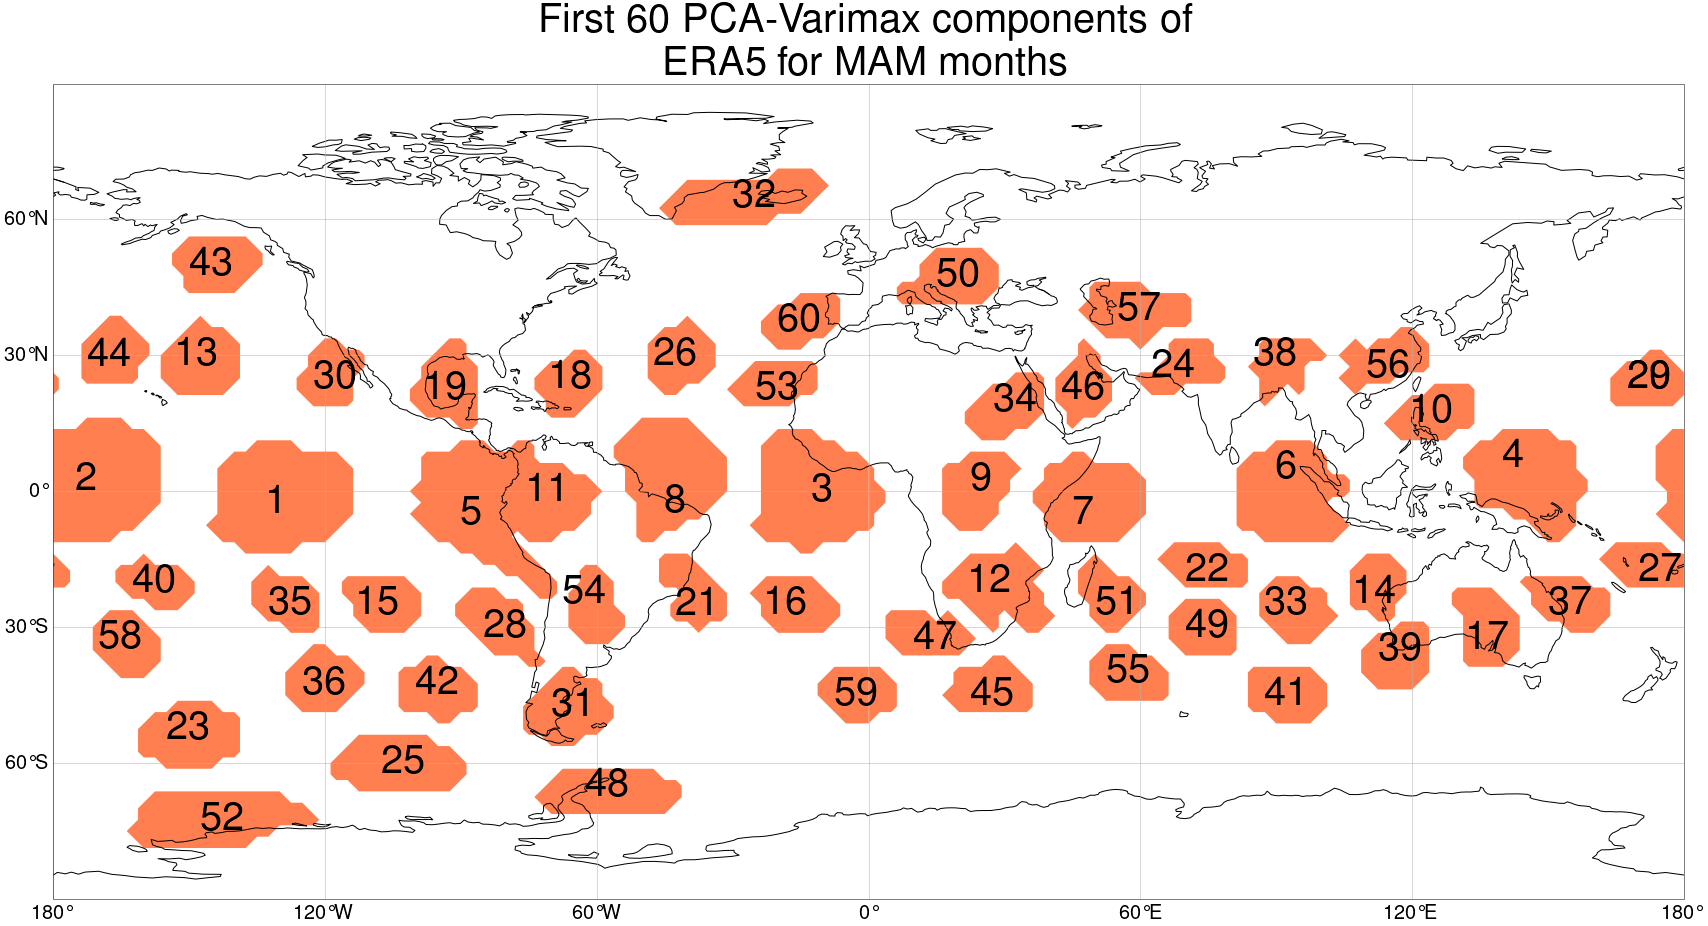

In [11]:
ncar_weights = pickle.load(open("/work/bd1083/b309165/CMIP6_CME/output_pca/era5_1979-2014_weights_timebin1/varimax_OBS6_ERA5_reanaly_1_day_psl_1979-2014_detrend.nc_100-comps_timebin-1_months-[3, 4, 5].bin","rb"))
    #print(ncar_weights["results"].keys())
    #print(ncar_weights["results"]["weights"][:,0].reshape(144,-1))
cube_ncar_weights = cube_11
comp_used=60
selected_comps_file="/work/bd1083/b309165/CMIP6_CME/script/selected_comps_files_1979-2014_timebin1/selected_comps_era5_mam.csv"
comps_csv = pd.read_csv(selected_comps_file)
all_modes = np.zeros((comp_used,73,144))
max_positions=np.zeros((comp_used,2))
for i in range(comp_used):
    idx= int(comps_csv["comps"][i])
    cube_ncar_data = np.concatenate((np.zeros((1,144)),ncar_weights["results"]["weights"][:,idx].reshape(71,144),np.zeros((1,144))),axis=0)
    cube_ncar_weights.data = cube_ncar_data
    vmax = np.amax(cube_ncar_weights.data)
    vmax_pos = np.unravel_index(np.argmax(cube_ncar_weights.data, axis=None), cube_ncar_weights.data.shape)
    vmin= -vmax
    mode_core = np.where(cube_ncar_weights.data > 0.8*vmax,np.ones(cube_ncar_weights.data.shape),np.zeros(cube_ncar_weights.data.shape))
    all_modes[i,:]=mode_core
    lat_max,lon_max= lat[vmax_pos[0]],lon[vmax_pos[1]]
    if lon_max > 180: lon_max-= 360
    max_positions[i,:]= lat_max,lon_max

all_modes= np.maximum.reduce(all_modes)
cube_ncar_weights.data=all_modes
fig = plt.figure(figsize=(30, 15))
qplt.contourf(cube_ncar_weights,1,colors=("white","coral"), add_colorbar=False)
plt.gci().colorbar.remove()
ax = plt.gca()
ax.coastlines()
gridlines=ax.gridlines(draw_labels=True)
# Set properties for the gridline labels
gridlines.xlabels_top = False
gridlines.ylabels_right = False

# Optional: Customize the appearance of the labels
gridlines.xlabel_style = {'size': 20, 'color': 'black'}
gridlines.ylabel_style = {'size': 20, 'color': 'black'}
print(sum(ncar_weights["results"]["explained_var"][:60]/ncar_weights["results"]["total_var"]))

max_x_position= max_positions[:,1]
max_y_position= max_positions[:,0]
for x, y, mode_number in zip(max_x_position, max_y_position, range(1,comp_used+1)) :
    ax.text(x, y, str(mode_number), color="black",
             horizontalalignment='center',verticalalignment='center',fontweight="semibold",fontsize=40)
    # plt.text(-125, -5, "mode 1", color="green")
    # plt.text(-40, -5, "mode 2", color="green")
plt.title('First 60 PCA-Varimax components of \n ERA5 for MAM months',ha="center",fontsize=40)
plt.savefig('plot_components_map/map_60components_era5_mam.pdf', dpi=300)
plt.show()



0.6384807801597367


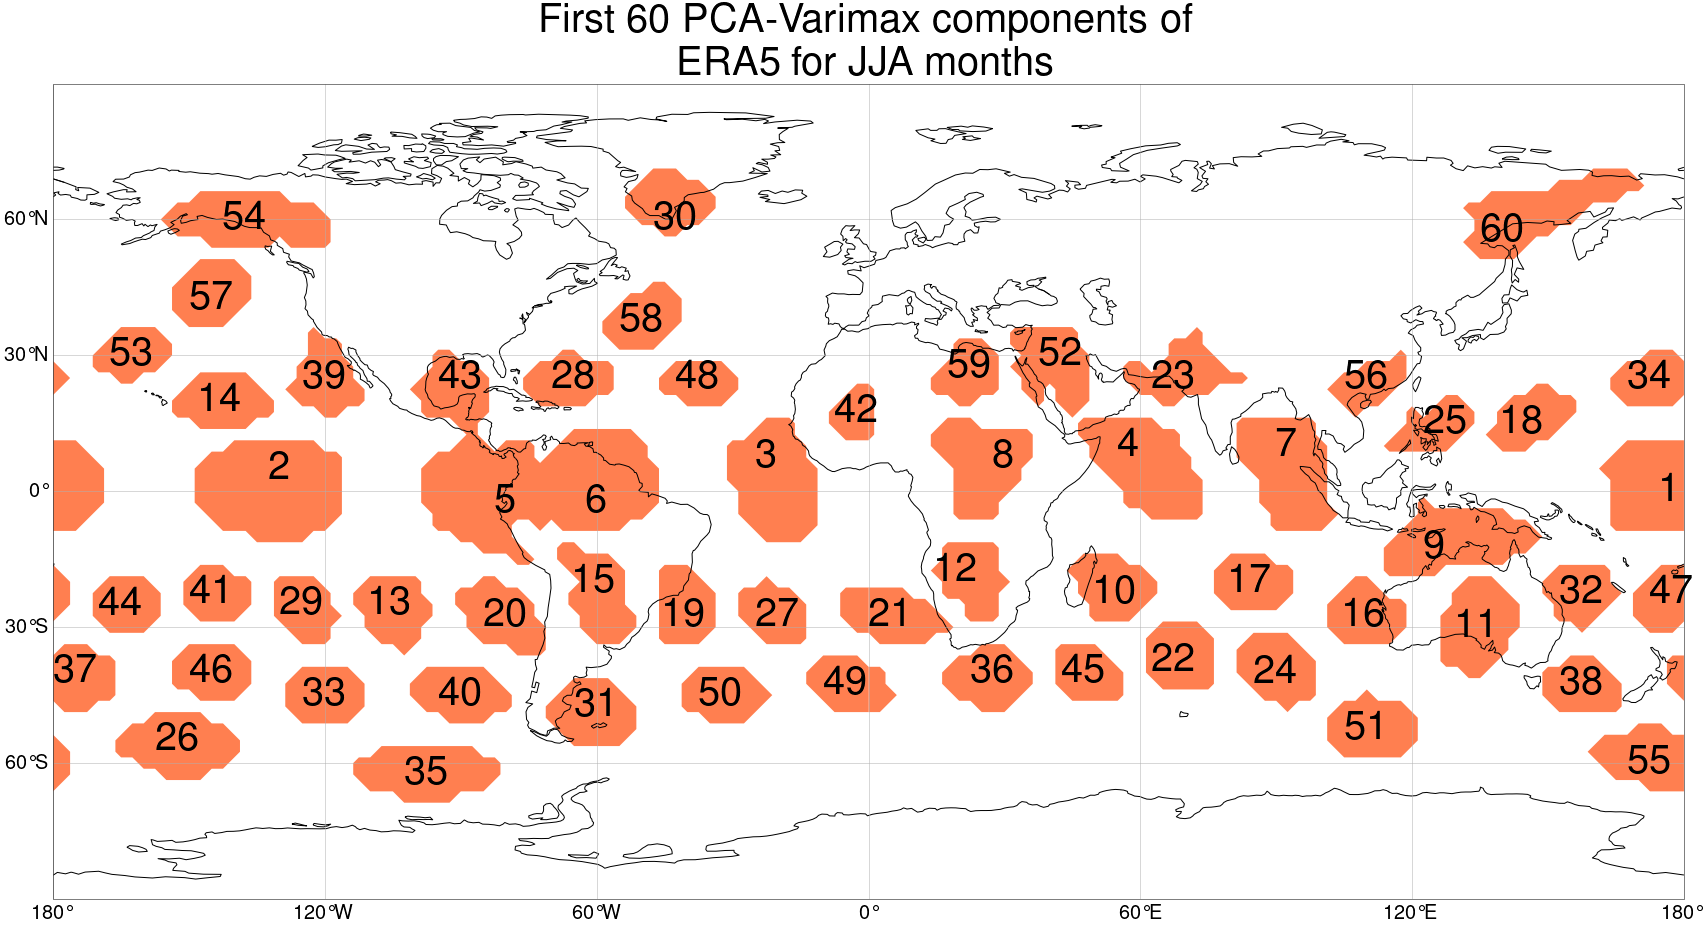

In [12]:
ncar_weights = pickle.load(open("/work/bd1083/b309165/CMIP6_CME/output_pca/era5_1979-2014_weights_timebin1/varimax_OBS6_ERA5_reanaly_1_day_psl_1979-2014_detrend.nc_100-comps_timebin-1_months-[6, 7, 8].bin","rb"))
    #print(ncar_weights["results"].keys())
    #print(ncar_weights["results"]["weights"][:,0].reshape(144,-1))
cube_ncar_weights = cube_11
comp_used=60
selected_comps_file="/work/bd1083/b309165/CMIP6_CME/script/selected_comps_files_1979-2014_timebin1/selected_comps_era5_jja.csv"
comps_csv = pd.read_csv(selected_comps_file)
all_modes = np.zeros((comp_used,73,144))
max_positions=np.zeros((comp_used,2))
for i in range(comp_used):
    idx= int(comps_csv["comps"][i])
    cube_ncar_data = np.concatenate((np.zeros((1,144)),ncar_weights["results"]["weights"][:,idx].reshape(71,144),np.zeros((1,144))),axis=0)
    cube_ncar_weights.data = cube_ncar_data
    vmax = np.amax(cube_ncar_weights.data)
    vmax_pos = np.unravel_index(np.argmax(cube_ncar_weights.data, axis=None), cube_ncar_weights.data.shape)
    vmin= -vmax
    mode_core = np.where(cube_ncar_weights.data > 0.8*vmax,np.ones(cube_ncar_weights.data.shape),np.zeros(cube_ncar_weights.data.shape))
    all_modes[i,:]=mode_core
    lat_max,lon_max= lat[vmax_pos[0]],lon[vmax_pos[1]]
    if lon_max > 180: lon_max-= 360
    max_positions[i,:]= lat_max,lon_max

all_modes= np.maximum.reduce(all_modes)
cube_ncar_weights.data=all_modes
fig = plt.figure(figsize=(30, 15))
qplt.contourf(cube_ncar_weights,1,colors=("white","coral"), add_colorbar=False)
plt.gci().colorbar.remove()
ax = plt.gca()
ax.coastlines()
gridlines=ax.gridlines(draw_labels=True)
# Set properties for the gridline labels
gridlines.xlabels_top = False
gridlines.ylabels_right = False

# Optional: Customize the appearance of the labels
gridlines.xlabel_style = {'size': 20, 'color': 'black'}
gridlines.ylabel_style = {'size': 20, 'color': 'black'}
print(sum(ncar_weights["results"]["explained_var"][:60]/ncar_weights["results"]["total_var"]))

max_x_position= max_positions[:,1]
max_y_position= max_positions[:,0]
for x, y, mode_number in zip(max_x_position, max_y_position, range(1,comp_used+1)) :
    ax.text(x, y, str(mode_number), color="black",
             horizontalalignment='center',verticalalignment='center',fontweight="semibold",fontsize=40)
    # plt.text(-125, -5, "mode 1", color="green")
    # plt.text(-40, -5, "mode 2", color="green")
plt.title('First 60 PCA-Varimax components of \n ERA5 for JJA months',ha="center",fontsize=40)
plt.savefig('plot_components_map/map_60components_era5_jja.pdf', dpi=300)
plt.show()



0.6207807187234506


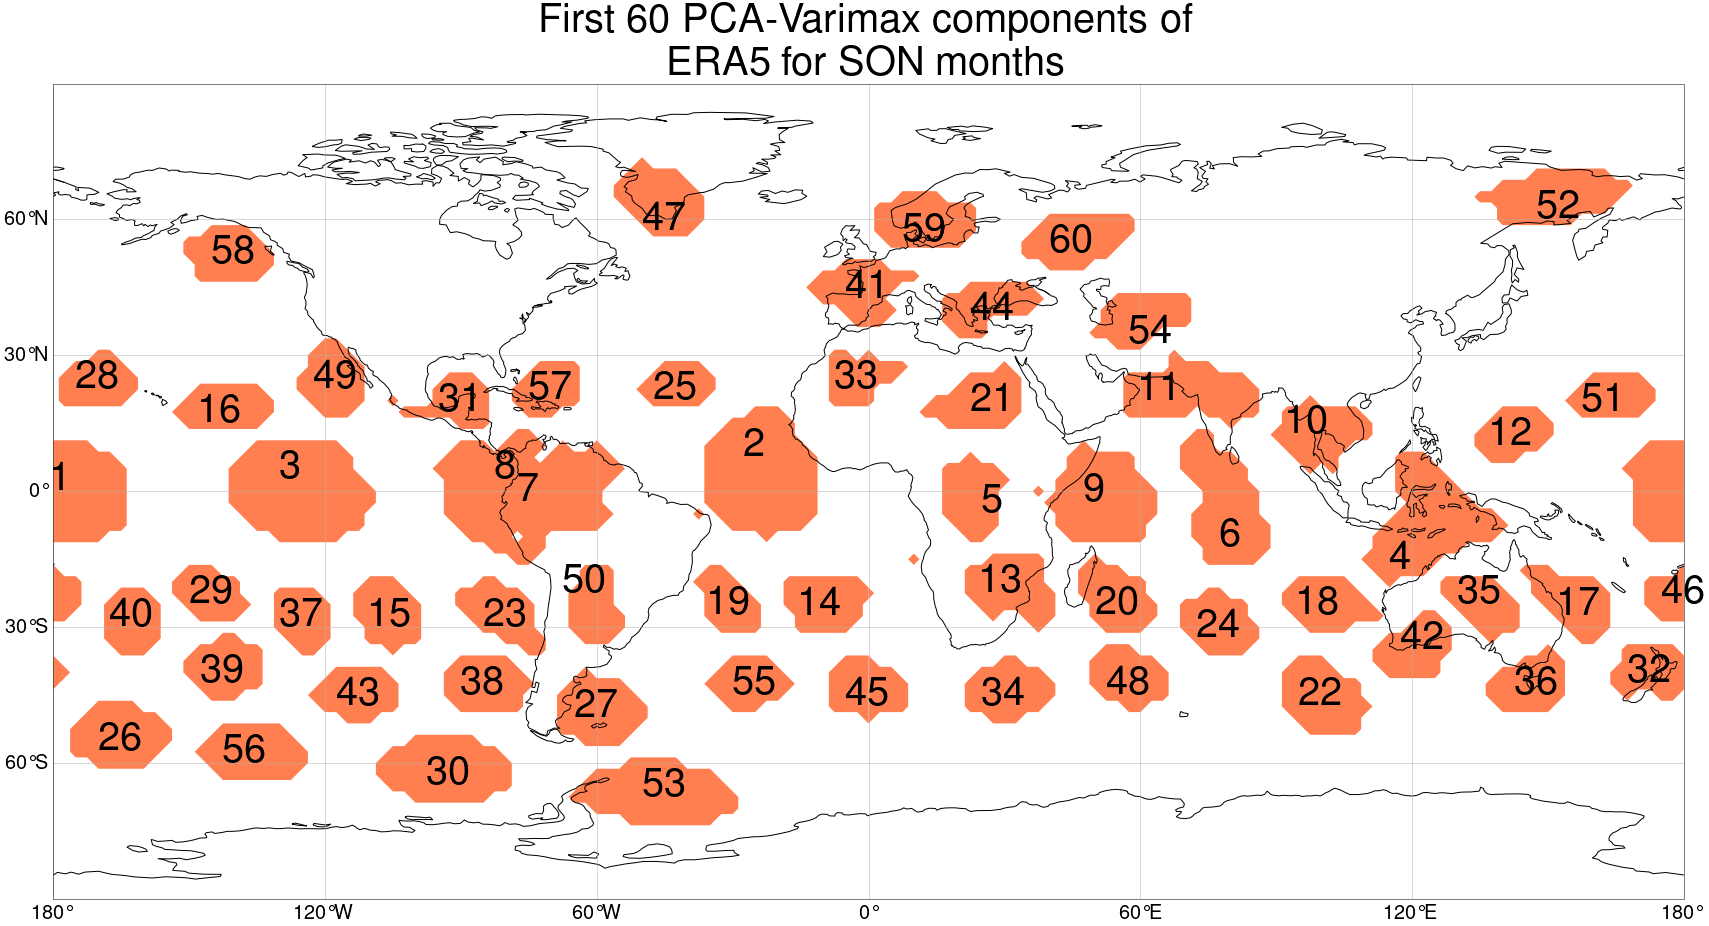

In [13]:
ncar_weights = pickle.load(open("/work/bd1083/b309165/CMIP6_CME/output_pca/era5_1979-2014_weights_timebin1/varimax_OBS6_ERA5_reanaly_1_day_psl_1979-2014_detrend.nc_100-comps_timebin-1_months-[9, 10, 11].bin","rb"))
    #print(ncar_weights["results"].keys())
    #print(ncar_weights["results"]["weights"][:,0].reshape(144,-1))
cube_ncar_weights = cube_11
comp_used=60
selected_comps_file="/work/bd1083/b309165/CMIP6_CME/script/selected_comps_files_1979-2014_timebin1/selected_comps_era5_son.csv"
comps_csv = pd.read_csv(selected_comps_file)
all_modes = np.zeros((comp_used,73,144))
max_positions=np.zeros((comp_used,2))
for i in range(comp_used):
    idx= int(comps_csv["comps"][i])
    cube_ncar_data = np.concatenate((np.zeros((1,144)),ncar_weights["results"]["weights"][:,idx].reshape(71,144),np.zeros((1,144))),axis=0)
    cube_ncar_weights.data = cube_ncar_data
    vmax = np.amax(cube_ncar_weights.data)
    vmax_pos = np.unravel_index(np.argmax(cube_ncar_weights.data, axis=None), cube_ncar_weights.data.shape)
    vmin= -vmax
    mode_core = np.where(cube_ncar_weights.data > 0.8*vmax,np.ones(cube_ncar_weights.data.shape),np.zeros(cube_ncar_weights.data.shape))
    all_modes[i,:]=mode_core
    lat_max,lon_max= lat[vmax_pos[0]],lon[vmax_pos[1]]
    if lon_max > 180: lon_max-= 360
    max_positions[i,:]= lat_max,lon_max

all_modes= np.maximum.reduce(all_modes)
cube_ncar_weights.data=all_modes
fig = plt.figure(figsize=(30, 15))
qplt.contourf(cube_ncar_weights,1,colors=("white","coral"), add_colorbar=False)
plt.gci().colorbar.remove()
ax = plt.gca()
ax.coastlines()
gridlines=ax.gridlines(draw_labels=True)
# Set properties for the gridline labels
gridlines.xlabels_top = False
gridlines.ylabels_right = False

# Optional: Customize the appearance of the labels
gridlines.xlabel_style = {'size': 20, 'color': 'black'}
gridlines.ylabel_style = {'size': 20, 'color': 'black'}
print(sum(ncar_weights["results"]["explained_var"][:60]/ncar_weights["results"]["total_var"]))

max_x_position= max_positions[:,1]
max_y_position= max_positions[:,0]
for x, y, mode_number in zip(max_x_position, max_y_position, range(1,comp_used+1)) :
    ax.text(x, y, str(mode_number), color="black",
             horizontalalignment='center',verticalalignment='center',fontweight="semibold",fontsize=40)
    # plt.text(-125, -5, "mode 1", color="green")
    # plt.text(-40, -5, "mode 2", color="green")
plt.title('First 60 PCA-Varimax components of \n ERA5 for SON months',ha="center",fontsize=40)
plt.savefig('plot_components_map/map_60components_era5_son.pdf', dpi=300)
plt.show()



<Figure size 330x250 with 0 Axes>

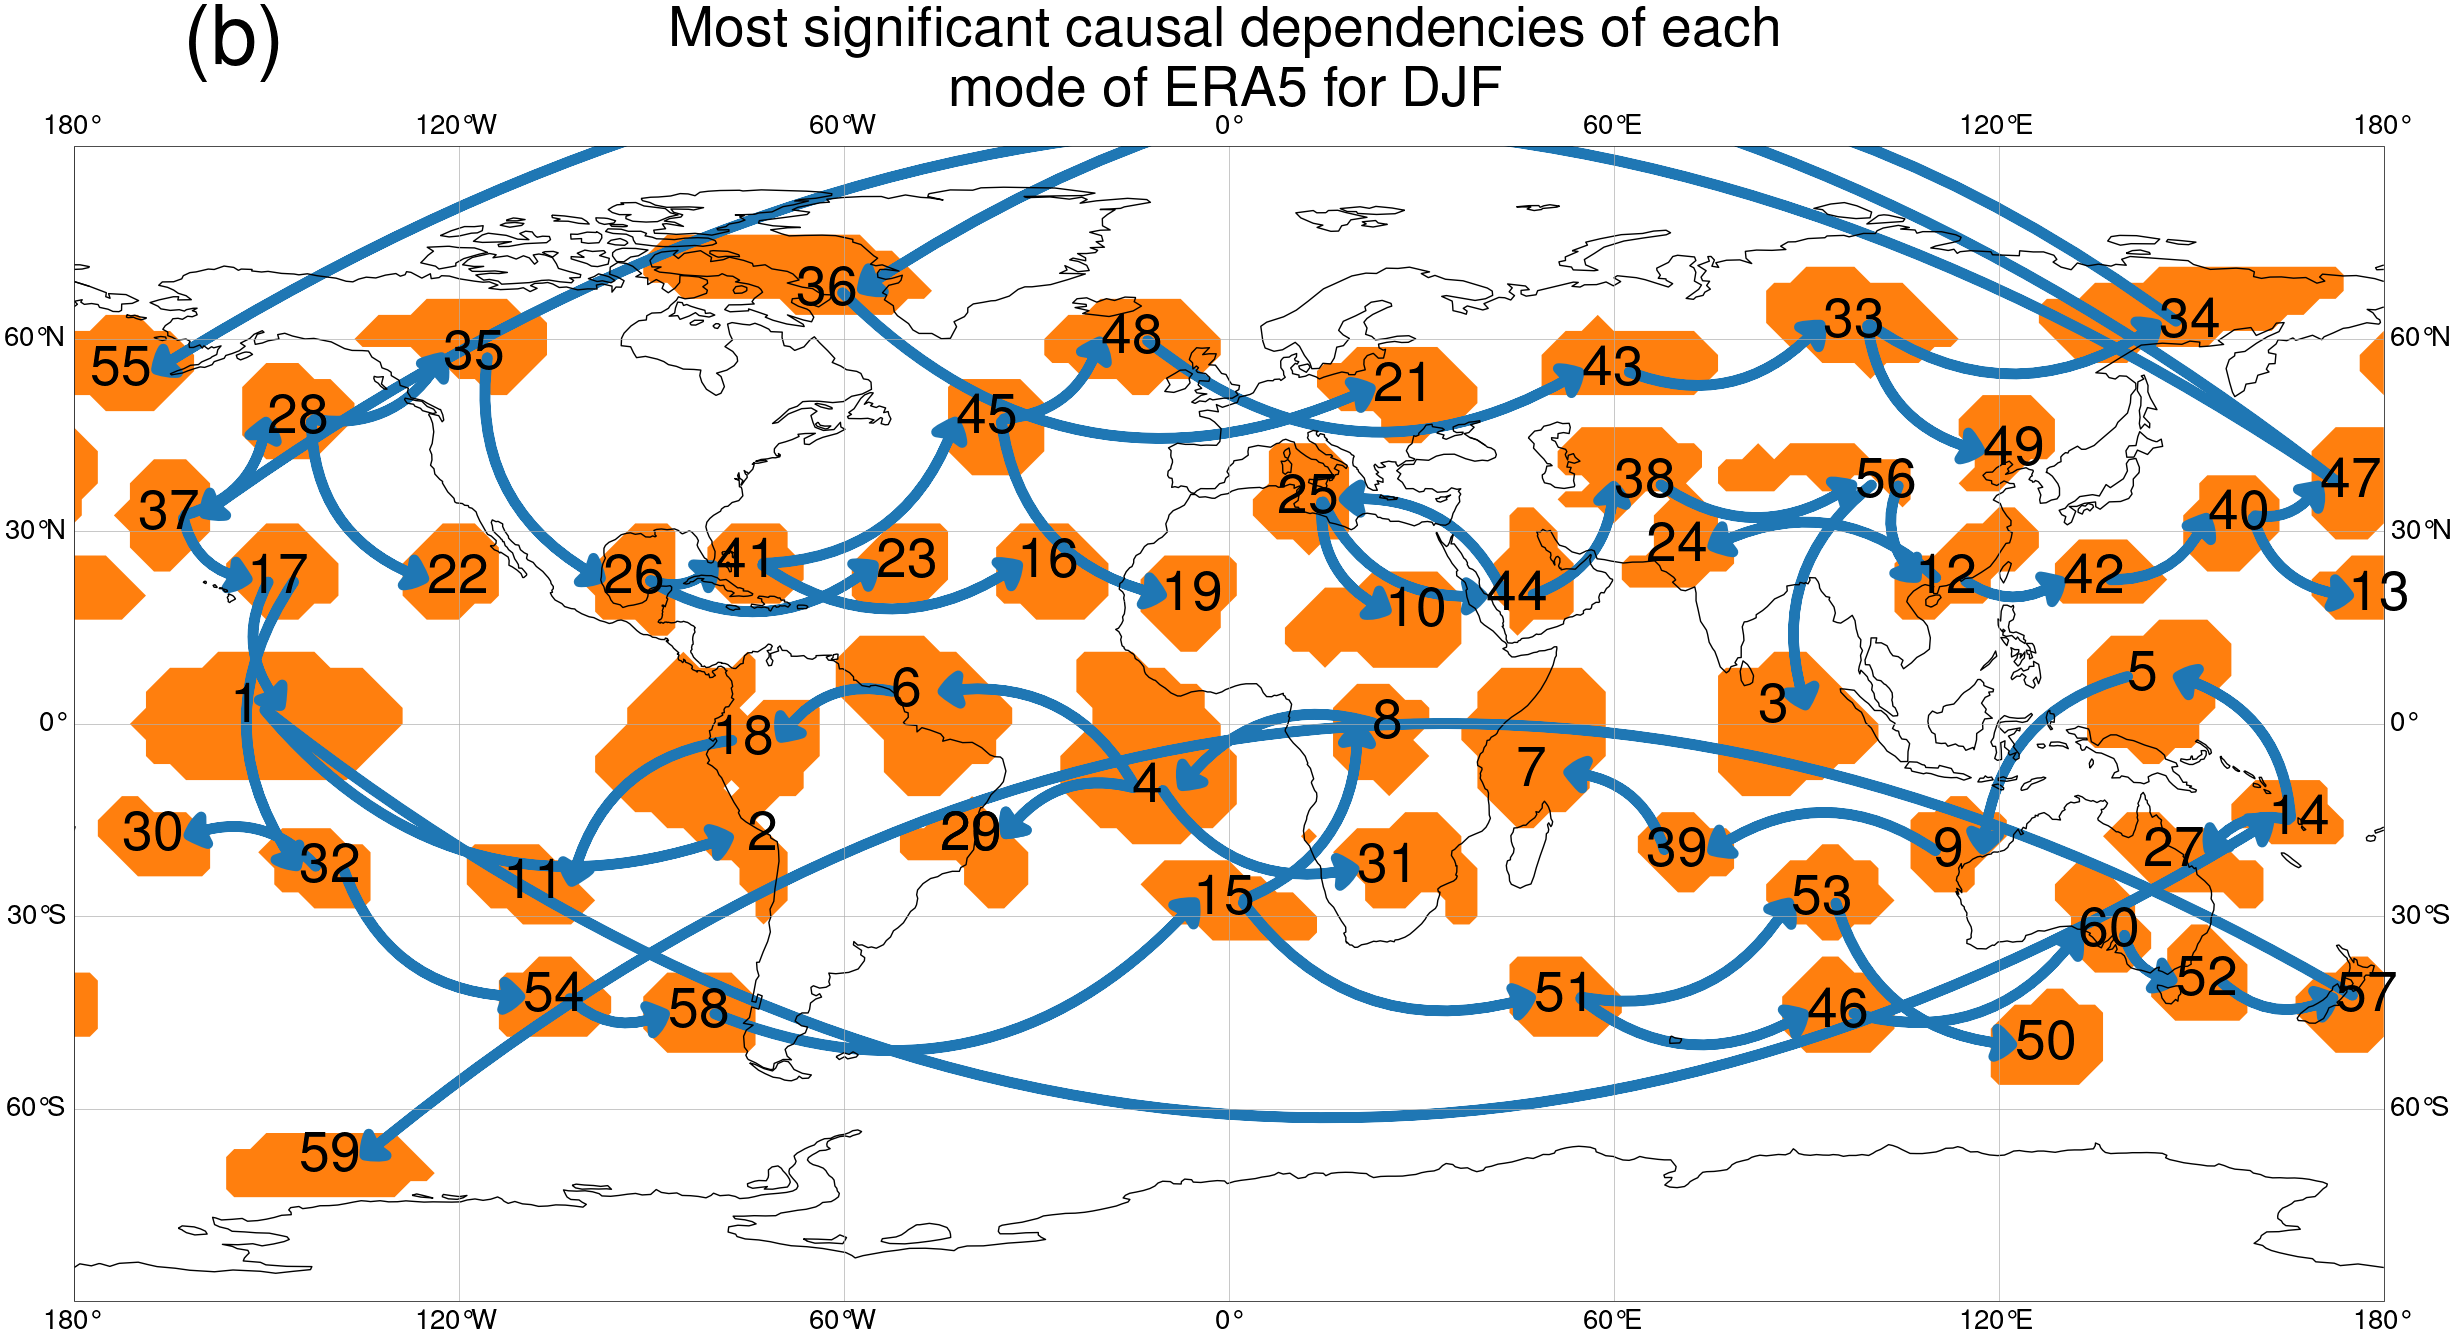

In [17]:
plt.clf()
ncar_weights = pickle.load(open("/work/bd1083/b309165/CMIP6_CME/output_pca/era5_1979-2014_weights_timebin1/varimax_OBS6_ERA5_reanaly_1_day_psl_1979-2014_detrend.nc_100-comps_timebin-1_months-[12, 1, 2].bin","rb"))
    #print(ncar_weights["results"].keys())
    #print(ncar_weights["results"]["weights"][:,0].reshape(144,-1))
cube_ncar_weights = cube_11
selected_comps_file="/work/bd1083/b309165/CMIP6_CME/script/selected_comps_files_1979-2014_timebin1/selected_comps_era5_djf.csv"
comps_csv = pd.read_csv(selected_comps_file)
comp_used=60
all_modes = np.zeros((comp_used,73,144))
max_positions=np.zeros((comp_used,2))
for i in range(comp_used):
    idx= int(comps_csv["comps"][i])
    cube_ncar_data = np.concatenate((np.zeros((1,144)),ncar_weights["results"]["weights"][:,idx].reshape(71,144),np.zeros((1,144))),axis=0)
    cube_ncar_weights.data = cube_ncar_data
    vmax = np.amax(cube_ncar_weights.data)
    vmax_pos = np.unravel_index(np.argmax(cube_ncar_weights.data, axis=None), cube_ncar_weights.data.shape)
    vmin= -vmax
    mode_core = np.where(cube_ncar_weights.data > 0.8*vmax,np.ones(cube_ncar_weights.data.shape),np.zeros(cube_ncar_weights.data.shape))
    all_modes[i,:]=mode_core
    lat_max,lon_max= lat[vmax_pos[0]],lon[vmax_pos[1]]
    if lon_max > 180: lon_max-= 360
    max_positions[i,:]= lat_max,lon_max

all_modes= np.maximum.reduce(all_modes)
cube_ncar_weights.data=all_modes

plt.figure(figsize=(30, 15))
qplt.contourf(cube_ncar_weights,1,colors=("white","tab:orange"))
plt.gci().colorbar.remove()
ax = plt.gca()
ax.coastlines()
gridlines=ax.gridlines(draw_labels=True)
# Set properties for the gridline labels
gridlines.xlabels_top = False
gridlines.ylabels_right = False

# Optional: Customize the appearance of the labels
gridlines.xlabel_style = {'size': 20, 'color': 'black'}
gridlines.ylabel_style = {'size': 20, 'color': 'black'}

max_x_position= max_positions[:,1]
max_y_position= max_positions[:,0]
global_res_path = "/work/bd1083/b309165/CMIP6_CME/results/results_CMIP6/global_link_and_parents_1979-2014_era5_weights_psl_timebin1x2_60selectedcomps_taumax20.bin"
selected_comps_indices=[i for i in range(0,60)]
var_names=["X_"+str(i) for i in range(0,60)]
with open(global_res_path, 'rb') as file:
    global_res = pickle.load(file)
#Function to compute F1-score from p_matrices and val_matrices
alpha = 0.00001
ref_ds="ERA5"
p_mat_dic=global_res["p_val"][alpha]
val_mat_dic= global_res["val_mat"][alpha]
season = "[12, 1, 2]"
p_mat_ncar=p_mat_dic[season]["ERA5"][""][:comp_used,:comp_used,:]
for i in range(p_mat_ncar.shape[0]):
    for j in range(p_mat_ncar.shape[1]):
        for tau in range(p_mat_ncar.shape[2]):
            if tau==0:
                p_mat_ncar[i,j,tau]=1.
            if i==j:
                p_mat_ncar[i,j,tau]=1.
strongest_parents=[]
strongest_lags=[]
p_mat_ncar[np.isnan(p_mat_ncar)] = 1.
for j in range(p_mat_ncar.shape[1]):
    idx_max= np.unravel_index(np.argmin(p_mat_ncar[:,j,:], axis=None), p_mat_ncar[:,j,:].shape)
    parent,lag= idx_max[0],idx_max[1]
    strongest_parents.append(parent)
    strongest_lags.append(lag)

for x, y, parent,mode_number in zip(max_x_position[:comp_used], max_y_position[:comp_used],strongest_parents[:comp_used], range(1,comp_used+1)) :
    plt.text(x, y, str(mode_number), color="black",
             horizontalalignment='center',verticalalignment='center',fontsize=40,fontweight="semibold")
    # plt.arrow(x,y,max_x_position[parent]-x,max_y_position[parent]-y,
    #           length_includes_head=True, shape="full",width=0.2,head_width=6,head_length=6,color="blue",alpha=0.6)
    if max_x_position[parent]>x:
        plt.gca().add_patch(patches.FancyArrowPatch((max_x_position[parent]-2, max_y_position[parent]),(x+5, 1*y), 
                            color="tab:blue",arrowstyle="fancy, head_width=20, head_length=12",connectionstyle="arc3,rad=.35", linewidth=7.5, aa=True))
    else:
        plt.gca().add_patch(patches.FancyArrowPatch((max_x_position[parent]+2, max_y_position[parent]),(x-5, 1*y), 
                            color="tab:blue",arrowstyle="fancy, head_width=20, head_length=12",connectionstyle="arc3,rad=.35", linewidth=7.5, aa=True))
    # plt.text(-125, -5, "mode 1", color="green")
    # plt.text(-40, -5, "mode 2", color="green")
plt.text(0.05, 1.07, '(b)', fontsize=60, fontweight='bold', transform=plt.gca().transAxes)
plt.title('Most significant causal dependencies of each \n mode of ERA5 for DJF',fontsize=40,ha="center")
plt.savefig('map_era5_dependencies_revised.pdf', dpi=300)
plt.show()



In [56]:
print((p_mat_ncar[:,:,1:20] < 0.00001).sum())

1063


<Figure size 432x288 with 0 Axes>

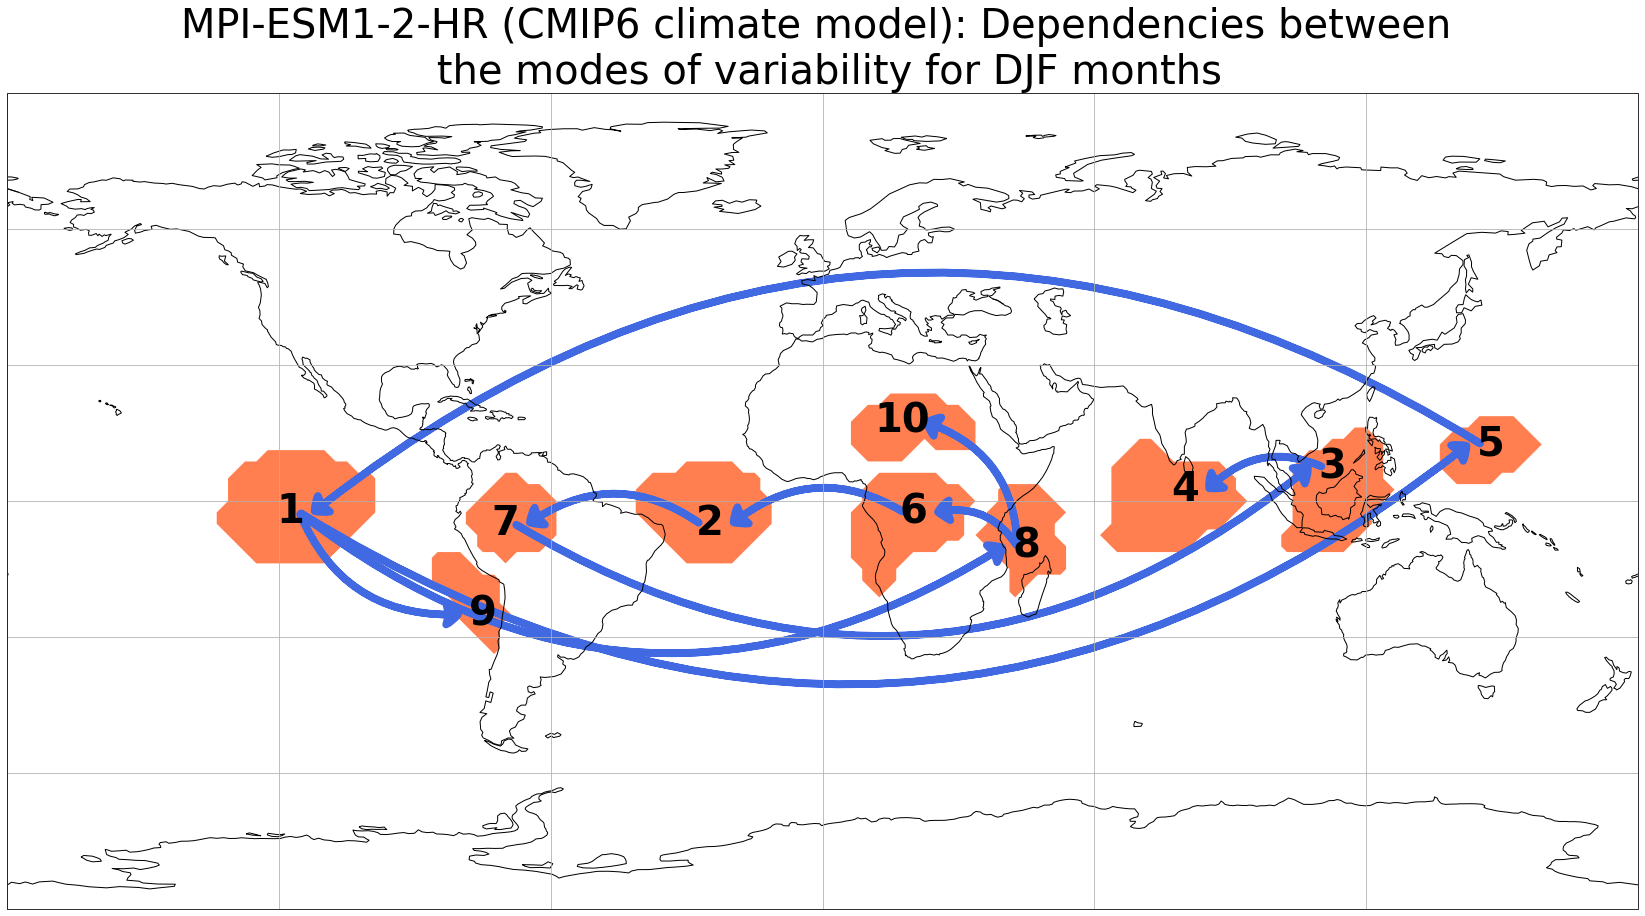

In [52]:
plt.clf()
ncar_weights = pickle.load(open("/work/bd1083/b309165/CMIP6_CME/output_pca/ncar_1979-2014_weights_timebin1/varimax_SLP_ncar_1979-2014_detrend.nc_100-comps_timebin-1_months-[12, 1, 2].bin","rb"))
    #print(ncar_weights["results"].keys())
    #print(ncar_weights["results"]["weights"][:,0].reshape(144,-1))
cube_ncar_weights = cube_11
selected_comps_file="/work/bd1083/b309165/CMIP6_CME/script/selected_comps_files_1979-2014_timebin1/selected_comps_NCEP_djf.csv"
comps_csv = pd.read_csv(selected_comps_file)
comp_used=10
all_modes = np.zeros((comp_used,73,144))
max_positions=np.zeros((comp_used,2))
for i in range(comp_used):
    idx= int(comps_csv["comps"][i])
    cube_ncar_data = np.concatenate((np.zeros((1,144)),ncar_weights["results"]["weights"][:,idx].reshape(71,144),np.zeros((1,144))),axis=0)
    cube_ncar_weights.data = cube_ncar_data
    vmax = np.amax(cube_ncar_weights.data)
    vmax_pos = np.unravel_index(np.argmax(cube_ncar_weights.data, axis=None), cube_ncar_weights.data.shape)
    vmin= -vmax
    mode_core = np.where(cube_ncar_weights.data > 0.8*vmax,np.ones(cube_ncar_weights.data.shape),np.zeros(cube_ncar_weights.data.shape))
    all_modes[i,:]=mode_core
    lat_max,lon_max= lat[vmax_pos[0]],lon[vmax_pos[1]]
    if lon_max > 180: lon_max-= 360
    max_positions[i,:]= lat_max,lon_max
    # cube_ncar_weights.data=mode_core
    #print(vmax)
    # plt.figure(figsize=(20, 10))
    # plt.subplot(121)
    # # qplt.contourf(cube_ncar_weights,2,cmap=plt.get_cmap('RdBu_r'),vmin=vmin,vmax=vmax) #coolwarm
    # qplt.contourf(cube_ncar_weights,1,colors=("white","red")) #coolwarm
    # #iplt.pcolormesh(cube_11)
    # plt.title('Season DJF: Map of the loadings of the ' + str(i) +'th PCA-Varimax component')
    #          'on a global longitude latitude grid')
    # ax = plt.gca()
    # ax.coastlines()
    # ax.gridlines()
    # plt.show()
all_modes= np.maximum.reduce(all_modes)
cube_ncar_weights.data=all_modes
plt.figure(figsize=(30, 15))
# qplt.contourf(cube_ncar_weights,1,colors=("white","red"))
qplt.contourf(cube_ncar_weights,1,colors=("white","coral"))
plt.gci().colorbar.remove()
ax = plt.gca()
ax.coastlines()
ax.gridlines()
max_x_position= max_positions[:,1]
max_y_position= max_positions[:,0]
global_res_path = "/work/bd1083/b309165/CMIP6_CME/results/results_CMIP6/global_link_and_parents_for_all_alpha_ncar_1979-2014_weights.bin"
selected_comps_indices=[i for i in range(0,50)]
var_names=["X_"+str(i) for i in range(0,50)]
#alpha_list = [0.05,0.01,0.001,0.0001,0.00001,0.000001]
global_res = cPickle.load(open(global_res_path,"rb"))
#Function to compute F1-score from p_matrices and val_matrices
alpha = 0.00001
ref_ds="ncar"
p_mat_dic=global_res["p_val"][alpha]
val_mat_dic= global_res["val_mat"][alpha]
link_mat_dic= global_res["links"][alpha]
season = "[12, 1, 2]"
link_mat_ncar=link_mat_dic[season]["MPI-ESM1-2-HR"]['r1i1p1f1']
p_mat_ncar=p_mat_dic[season]["MPI-ESM1-2-HR"]['r1i1p1f1'][:comp_used,:comp_used,:]
for i in range(p_mat_ncar.shape[0]):
    for j in range(p_mat_ncar.shape[1]):
        for tau in range(p_mat_ncar.shape[2]):
            if tau==0:
                p_mat_ncar[i,j,tau]=1.
            if i==j:
                p_mat_ncar[i,j,tau]=1.
strongest_parents=[]
strongest_lags=[]
for j in range(p_mat_ncar.shape[1]):
    idx_max= np.unravel_index(np.argmin(p_mat_ncar[:,j,:], axis=None), p_mat_ncar[:,j,:].shape)
    parent,lag= idx_max[0],idx_max[1]
    strongest_parents.append(parent)
    strongest_lags.append(lag)

for x, y, parent,mode_number in zip(max_x_position[:comp_used], max_y_position[:comp_used],strongest_parents[:comp_used], range(1,comp_used+1)) :
    plt.text(x, y, str(mode_number), color="black",
             horizontalalignment='center',verticalalignment='center',fontsize=40,fontweight="semibold")
    # plt.arrow(x,y,max_x_position[parent]-x,max_y_position[parent]-y,
    #           length_includes_head=True, shape="full",width=0.2,head_width=6,head_length=6,color="blue",alpha=0.6)
    if max_x_position[parent]>x:
        plt.gca().add_patch(patches.FancyArrowPatch((max_x_position[parent]-2, max_y_position[parent]),(x+5, 1*y), 
                            color="royalblue",arrowstyle="fancy, head_width=20, head_length=12",connectionstyle="arc3,rad=.35", linewidth=7.5, aa=True))
    else:
        plt.gca().add_patch(patches.FancyArrowPatch((max_x_position[parent]+2, max_y_position[parent]),(x-5, 1*y), 
                            color="royalblue",arrowstyle="fancy, head_width=20, head_length=12",connectionstyle="arc3,rad=.35", linewidth=7.5, aa=True))
    # plt.text(-125, -5, "mode 1", color="green")
plt.title('MPI-ESM1-2-HR (CMIP6 climate model): Dependencies between \n the modes of variability for DJF months',fontsize= 40,ha="center")
# plt.title('MPI-ESM1-2-HR (CMIP6 climate model): Dependencies between the 20 first modes of variability for winter months')
plt.savefig('plot_components_map/map_mpi_dependencies.pdf', dpi=600)
plt.show()
